<a href="https://colab.research.google.com/github/raffieeey/MasterResearchAutoML/blob/master/autosklearn/freedom/04A_Autosklearn_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!apt install gcc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [16]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [17]:
!apt-get install build-essential swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [18]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   201  100   201    0     0   2258      0 --:--:-- --:--:-- --:--:--  2258


In [19]:
!pip install auto-sklearn

In [20]:
!pip install pmlb
!pip install pytictoc

In [21]:
%matplotlib inline
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate","True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate","True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall","Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = (np.sum(labels)/len(labels))[0]
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall","Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 4.5
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

figure()

<Figure size 648x324 with 0 Axes>

In [0]:
from autosklearn.estimators import AutoSklearnClassifier
import autosklearn.metrics as metrics

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, log_loss
import numpy as np
import pandas as pd


class CheckBinomial:
  def __init__(self, checkunique):
    self._bintype = 'binomial' if pd.Series(checkunique).nunique() == 2 else 'multinomial'

  def MLMetrics(self):
    if self._bintype == 'binomial':
      return [metrics.accuracy,  metrics.roc_auc , metrics.log_loss]
    elif self._bintype == 'multinomial':
      return [metrics.accuracy, metrics.log_loss]

class MetricsCalc:
  def __init__(self, truth, predictions, probab, dattype):
    self.truth = truth
    self.predictions = predictions
    self._target = predictions
    self._probabmax = np.max(probab, axis=1)
    self._probab = probab
    self._type = dattype

  def acc(self):
    return float(accuracy_score(self.truth,self._target))

  def auc(self):
    if self._type == "binomial":
      return float(roc_auc_score(self.truth, self._probabmax))
    elif self._type == "multinomial":
      return np.nan 

  def logloss(self):
    return float(log_loss(self.truth, self._probab))
  
  def cm(self):
    return confusion_matrix(self.truth, self._target)
  
  def f1(self):
    if self._type == "binomial":
      return float(f1_score(self.truth, self._target, average='binary'))
    elif self._type == "multinomial":
      return float(f1_score(self.truth, self._target, average='macro'))

________________________________________________________________________________
*** Dataset Name: adult ***
Elapsed time is 1803.286493 seconds.
*** Top algorithm: *** sgd
  classifier:__choice__  ...  classifier:sgd:l1_ratio
0                   sgd  ...                 0.012819

[1 rows x 10 columns]


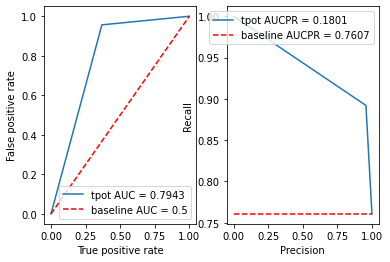

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
[WARNING] [2020-05-28 11:19:35,137:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 11:19:39,361:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 11:19:47,682:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 11:19:53,351:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 11:19:55,609:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 11:20:08,534:smac.runhistory.runh

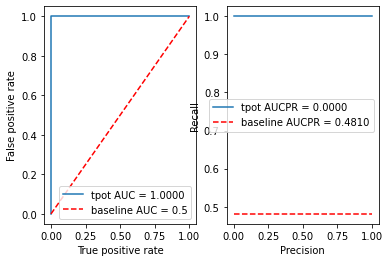

________________________________________________________________________________
*** Dataset Name: churn ***
Elapsed time is 1804.319982 seconds.
*** Top algorithm: *** random_forest
  classifier:__choice__  ... classifier:random_forest:min_weight_fraction_leaf
0         random_forest  ...                                               0.0

[1 rows x 10 columns]


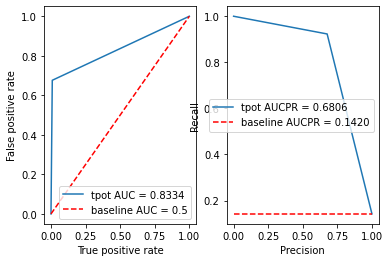

________________________________________________________________________________
*** Dataset Name: nursery ***
[WARNING] [2020-05-28 12:40:49,683:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 12:41:11,798:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 12:42:12,534:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 12:42:29,073:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 12:43:35,059:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-05-28 12:44:15,128:smac.runhistory.runhistory2ep

In [23]:
from pmlb import classification_dataset_names, regression_dataset_names,fetch_data
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split
from pytictoc import TicToc
import pandas as pd

df_result = pd.DataFrame(columns=["dataset_name", "metrics_recorded", "AUC", "ACC","logloss", "f1_score"])

preds = {}
preds_prob = {}
cm_preds = {}
top_algo = {}
t = TicToc()


sel_clss_dtst = ['adult','agaricus-lepiota', 'churn', 'nursery', 'satimage','texture']
sel_rgrs_dtst = ['294_satellite_image','218_house_8L', '227_cpu_small', '503_wind', '344_mv','215_2dplanes']

ix = 0

for class_dtst in sel_clss_dtst:
  for metrics_test in [metrics.accuracy]:
        print("_"*80)
        print(f"*** Dataset Name: {class_dtst} ***")
        df_result.loc[ix,"dataset_name"] = class_dtst
        df_result.loc[ix,"metrics_recorded"] = metrics_test
        X, y = fetch_data(class_dtst, return_X_y=True)
        c=CheckBinomial(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)
        y_train = pd.DataFrame(y_train).values.ravel()
        y_test = pd.DataFrame(y_test).values.ravel()
        list_metrics = c.MLMetrics()
        automl = AutoSklearnClassifier(seed=69, n_jobs=4, ml_memory_limit=2048,time_left_for_this_task=1800)
        t.tic()
        automl.fit(X_train,y_train, metric=metrics_test if metrics_test in list_metrics else None)
        t.toc()
        inse = automl.show_models()
        df = pd.DataFrame(eval(inse.split("(")[2].split("))")[0].split("dataset_properties")[0]))
        col_list = [x for x in df.columns if "classifier" in x]
        top_algo[class_dtst] = df.loc[:,'classifier:__choice__'][0]
        print("*** Top algorithm: ***", df.loc[:,'classifier:__choice__'][0])
        print(df[col_list])
        preds[class_dtst] = automl.predict(X_test)
        preds_prob[class_dtst] = automl.predict_proba(X_test)
        p = MetricsCalc(y_test,preds[class_dtst], preds_prob[class_dtst], c._bintype )
        if c._bintype == "binomial":
          df_result.loc[ix,"AUC"] = p.auc()
          df_result.loc[ix,"ACC"] = p.acc()
          df_result.loc[ix,"logloss"] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          df_result.loc[ix,"f1_score"] = p.f1()
          prediction_summary( pd.DataFrame(y_test), preds[class_dtst], "tpot")
          ix+=1
        elif c._bintype == "multinomial":
          df_result.loc[ix,"AUC"] = p.auc()
          df_result.loc[ix,"ACC"] = p.acc()
          df_result.loc[ix,"logloss"] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          df_result.loc[ix,"f1_score"] = p.f1()
          ix+=1

In [24]:
for i, val in enumerate(preds):
  print(preds[val])

[1 1 0 ... 1 1 1]
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 1 1 

In [25]:
for i, val in enumerate(preds):
  pd.DataFrame(preds[val]).to_csv(f"{val}.csv")

ImportError: ignored

In [26]:
df_result

ImportError: ignored

       dataset_name metrics_recorded       AUC       ACC   logloss  f1_score
0             adult         accuracy  0.709748  0.878813  0.613013  0.923117
1  agaricus-lepiota         accuracy  0.536124         1  0.155714         1
2             churn         accuracy  0.116222     0.946   0.18476  0.780488
3           nursery         accuracy       NaN  0.996914  0.287203  0.997592
4          satimage         accuracy       NaN  0.930124   1.68427  0.915166
5           texture         accuracy       NaN  0.996364   2.13801  0.996381

In [0]:
import pprint
pprint.pprint(cm_preds)

In [27]:
top_algo

{'adult': 'sgd',
 'agaricus-lepiota': 'liblinear_svc',
 'churn': 'random_forest',
 'nursery': 'libsvm_svc',
 'satimage': 'adaboost',
 'texture': 'adaboost'}

In [0]:
from google.colab import files
#df_result.to_csv("data_6.csv")
#files.download('data_6.csv')

with open('data_6.csv', 'w') as f:
    f.write(str(df_result))

with open('data_6.txt', 'w') as f:
    f.write(str(top_algo))

#files.download('data_6.txt')